In [1]:
import pandas as pd
import numpy as np
import time 

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
train = pd.read_parquet('train.parquet')
test = pd.read_parquet('test.parquet')

In [3]:
#Eliminamos las siguientes columnas, ya que de momento no las vamos a usar
train = train.drop(columns = ['device','interaction_type','command'])
#Eliminamos las siguientes columnas, ya que de momento no las vamos a usar
test = test.drop(columns = ['device','interaction_type','command'])

In [4]:
train.global_category.value_counts()

HOME AUTOMATION    14275
AUDIO              14258
CAMERA             13932
Name: global_category, dtype: int64

In [5]:
x_train, y_train = train.drop(columns=['global_category']), train['global_category']
x_test, y_test = test.drop(columns=['global_category']), test['global_category']

In [6]:
#Filtramos los datos en tres subconjuntos
audio_train = train[train['global_category'] == 'AUDIO']
camera_train = train[train['global_category'] == 'CAMERA']
HA_train = train[train['global_category'] == 'HOME AUTOMATION']

#Filtramos los datos en tres subconjuntos
audio_test = test[test['global_category'] == 'AUDIO']
camera_test = test[test['global_category'] == 'CAMERA']
HA_test = test[test['global_category'] == 'HOME AUTOMATION']

# PCK_SIZE:

## Train:

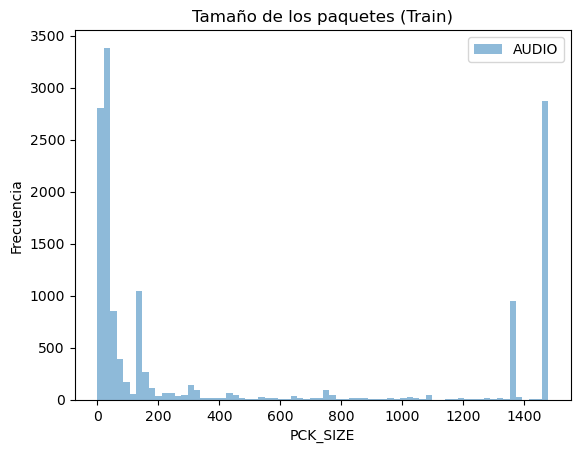

In [13]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(audio_train['pck_size'], bins=70, alpha=0.5, label='AUDIO')
#plt.hist(camera_train['pck_size'], bins=70, alpha=0.5, label='CAMERA')
#plt.hist(HA_train['pck_size'], bins=70, alpha=0.5, label='HA')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('PCK_SIZE')
plt.ylabel('Frecuencia')
plt.title('Tamaño de los paquetes (Train)')
plt.legend(loc='upper right')

# Paso 6: Mostrar gráfico
plt.show()

# Histograma L3_ip_dst_count:

## Train:

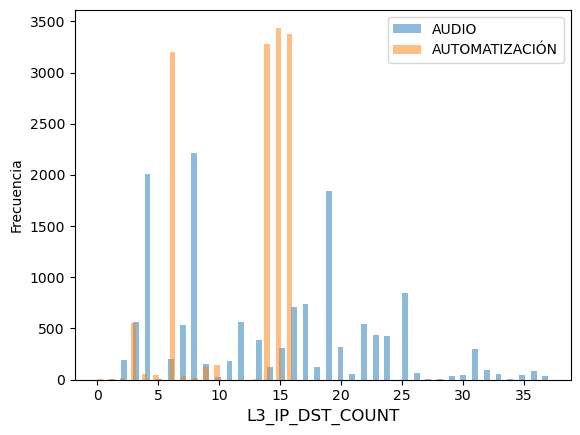

In [8]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(audio_train['L3_ip_dst_count'], bins=75, alpha=0.5, label='AUDIO')
#plt.hist(camera_train['L3_ip_dst_count'], bins=20, alpha=0.5, label='VIDEO')
plt.hist(HA_train['L3_ip_dst_count'], bins=35, alpha=0.5, label='AUTOMATIZACIÓN')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('L3_IP_DST_COUNT', fontsize=12)
plt.ylabel('Frecuencia')
#plt.title('Número de direcciones IP de destino a las que accede el dispositivo IoT')
plt.legend(loc='upper right')

# Paso 6: Mostrar gráfico
plt.show()

## Test

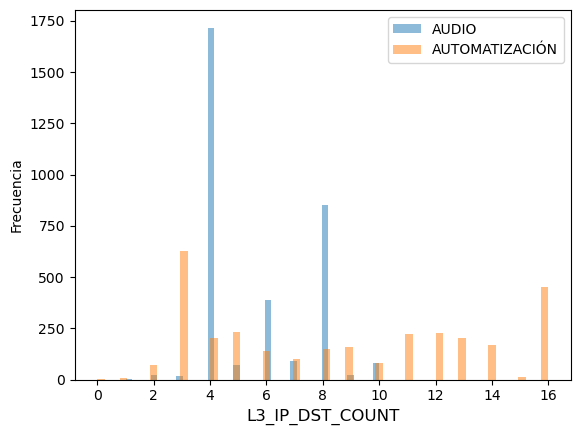

In [9]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(audio_test['L3_ip_dst_count'], bins=40, alpha=0.5, label='AUDIO')
#plt.hist(camera_test['L3_ip_dst_count'], bins=5, alpha=0.5, label='VIDEO')
plt.hist(HA_test['L3_ip_dst_count'], bins=60, alpha=0.5, label='AUTOMATIZACIÓN')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('L3_IP_DST_COUNT', fontsize=12)
plt.ylabel('Frecuencia')
#plt.title('Número de direcciones IP de destino a las que accede el dispositivo IoT')
plt.legend(loc='upper right')

# Paso 6: Mostrar gráfico
plt.show()

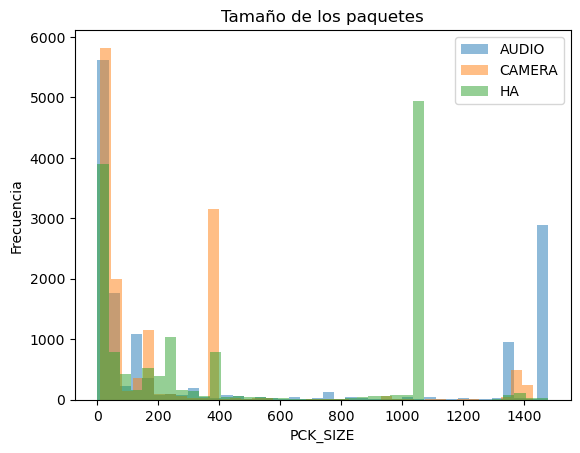

In [12]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(audio_train['pck_size'], bins=40, alpha=0.5, label='AUDIO')
plt.hist(camera_train['pck_size'], bins=40, alpha=0.5, label='CAMERA')
plt.hist(HA_train['pck_size'], bins=40, alpha=0.5, label='HA')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('PCK_SIZE')
plt.ylabel('Frecuencia')
plt.title('Tamaño de los paquetes')
plt.legend(loc='upper right')

# Paso 6: Mostrar gráfico
plt.show()

# DNS_count:

## Train:

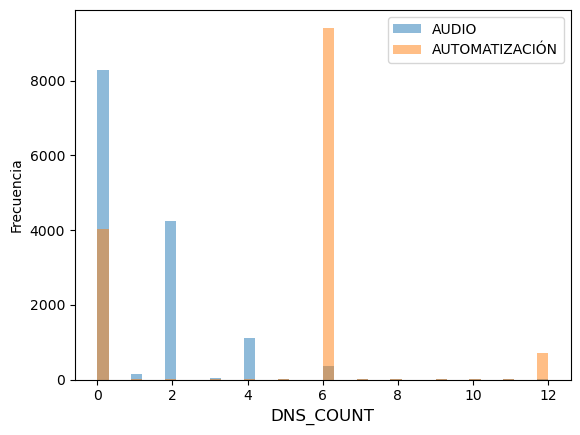

In [11]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(audio_train['DNS_count'], bins=40, alpha=0.5, label='AUDIO')
#plt.hist(camera_train['DNS_count'], bins=4, alpha=0.5, label='CAMERA')
plt.hist(HA_train['DNS_count'], bins=40, alpha=0.5, label='AUTOMATIZACIÓN')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('DNS_COUNT', fontsize=12)
plt.ylabel('Frecuencia')
#plt.title('Número de peticiones DNS')
plt.legend(loc='upper right')

# Paso 6: Mostrar gráfico
plt.show()

## Test:

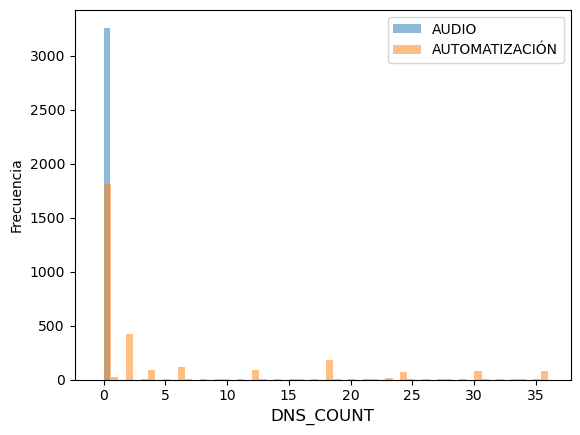

In [12]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(audio_test['DNS_count'], bins=2, alpha=0.5, label='AUDIO')     #1 Valor
#plt.hist(camera_test['DNS_count'], bins=2, alpha=0.5, label='CAMERA')   #1 Valor
plt.hist(HA_test['DNS_count'], bins=60, alpha=0.5, label='AUTOMATIZACIÓN')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('DNS_COUNT', fontsize=12)
plt.ylabel('Frecuencia')
#plt.title('Número de peticiones DNS')
plt.legend(loc='upper right')

# Paso 6: Mostrar gráfico
plt.show()

# TTL:

## Train:

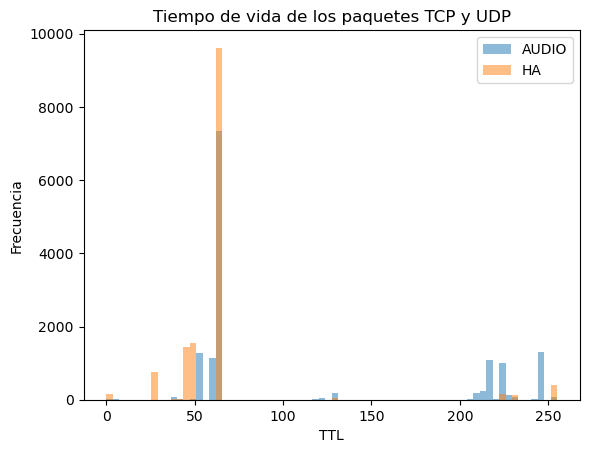

In [13]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(audio_train['ttl'], bins=70, alpha=0.5, label='AUDIO')
#plt.hist(camera_train['ttl'], bins=70, alpha=0.5, label='CAMERA')
plt.hist(HA_train['ttl'], bins=70, alpha=0.5, label='HA')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('TTL')
plt.ylabel('Frecuencia')
plt.title('Tiempo de vida de los paquetes TCP y UDP')
plt.legend(loc='upper right')

# Paso 6: Mostrar gráfico
plt.show()

## Test:

In [1]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(audio_test['ttl'], bins=90, alpha=0.6, label='AUDIO')
plt.hist(camera_test['ttl'], bins=90, alpha=0.6, label='CAMERA')
plt.hist(HA_test['ttl'], bins=90, alpha=0.6, label='HA')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('TTL')
plt.ylabel('Frecuencia')
plt.title('Tiempo de vida de los paquetes TCP y UDP')
plt.legend(loc='upper right')

# Paso 6: Mostrar gráfico
plt.show()

NameError: name 'plt' is not defined

# TRAIN VS TEST

## L3_IP_DST_COUNT:

### AUDIO:

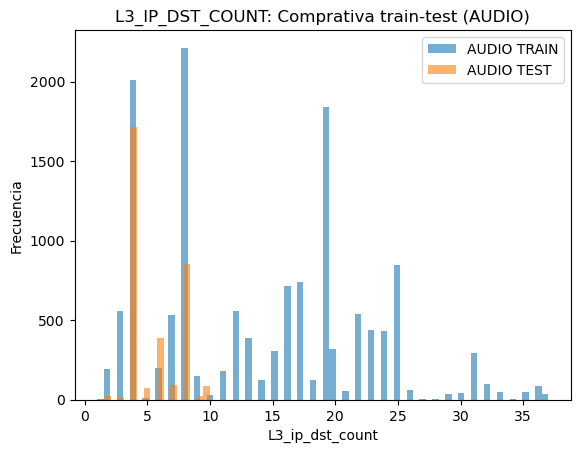

In [97]:
plt.hist(audio_train['L3_ip_dst_count'], bins=70, alpha=0.6, label='AUDIO TRAIN')
plt.hist(audio_test['L3_ip_dst_count'], bins=17, alpha=0.6, label='AUDIO TEST')


# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('L3_ip_dst_count')
plt.ylabel('Frecuencia')
plt.title('L3_IP_DST_COUNT: Comprativa train-test (AUDIO)')
plt.legend(loc='upper right')

# Paso 6: Mostrar gráfico
plt.show()

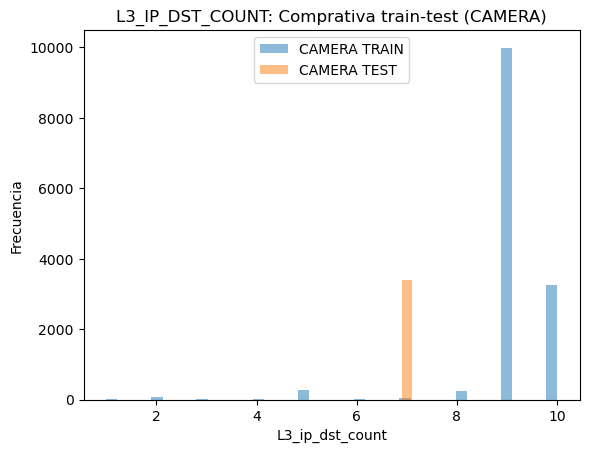

In [56]:
plt.hist(camera_train['L3_ip_dst_count'], bins=40, alpha=0.5, label='CAMERA TRAIN')
plt.hist(camera_test['L3_ip_dst_count'], bins=5, alpha=0.5, label='CAMERA TEST')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('L3_ip_dst_count')
plt.ylabel('Frecuencia')
plt.title('L3_IP_DST_COUNT: Comprativa train-test (CAMERA)')
plt.legend(loc='upper center')

# Paso 6: Mostrar gráfico
plt.show()

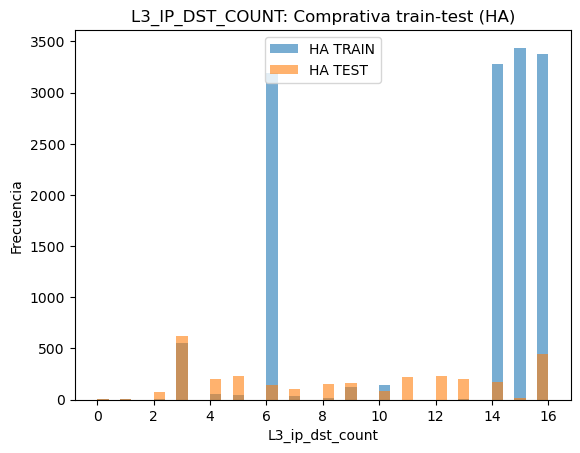

In [98]:
plt.hist(HA_train['L3_ip_dst_count'], bins=40, alpha=0.6, label='HA TRAIN')
plt.hist(HA_test['L3_ip_dst_count'], bins=40, alpha=0.6, label='HA TEST')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('L3_ip_dst_count')
plt.ylabel('Frecuencia')
plt.title('L3_IP_DST_COUNT: Comprativa train-test (HA)')
plt.legend(loc='upper center')

# Paso 6: Mostrar gráfico
plt.show()

## DNS_COUNT:

### AUDIO:

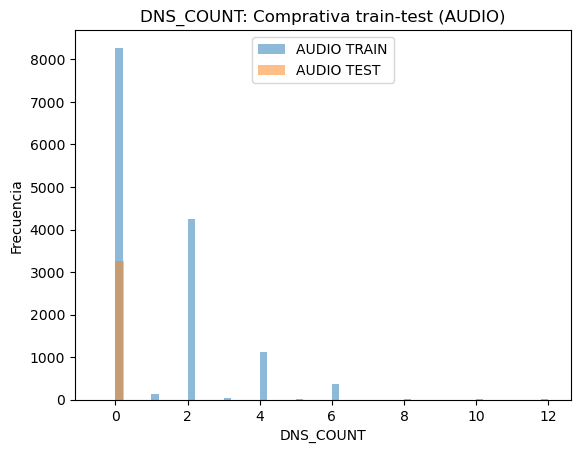

In [82]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(audio_train['DNS_count'], bins=60, alpha=0.5, label='AUDIO TRAIN')
plt.hist(audio_test['DNS_count'], bins=4, alpha=0.5, label='AUDIO TEST')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('DNS_COUNT')
plt.ylabel('Frecuencia')
plt.title('DNS_COUNT: Comprativa train-test (AUDIO)')
plt.legend(loc='upper center')

# Paso 6: Mostrar gráfico
plt.show()

## CAMERA:

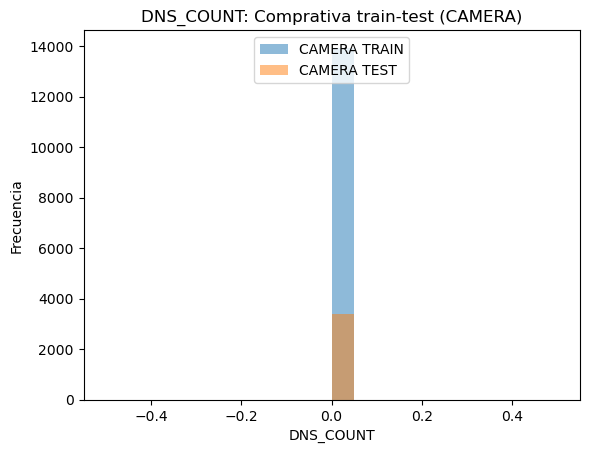

In [85]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(camera_train['DNS_count'], bins=20, alpha=0.5, label='CAMERA TRAIN')
plt.hist(camera_test['DNS_count'], bins=20, alpha=0.5, label='CAMERA TEST')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('DNS_COUNT')
plt.ylabel('Frecuencia')
plt.title('DNS_COUNT: Comprativa train-test (CAMERA)')
plt.legend(loc='upper center')

# Paso 6: Mostrar gráfico
plt.show()

## HA:

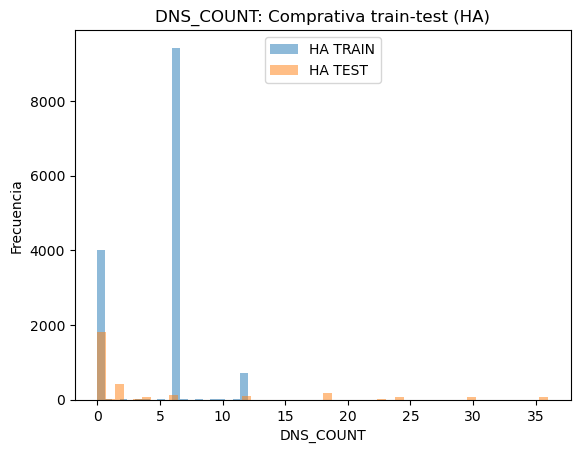

In [105]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(HA_train['DNS_count'], bins=20, alpha=0.5, label='HA TRAIN')
plt.hist(HA_test['DNS_count'], bins=50, alpha=0.5, label='HA TEST')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('DNS_COUNT')
plt.ylabel('Frecuencia')
plt.title('DNS_COUNT: Comprativa train-test (HA)')
plt.legend(loc='upper center')

# Paso 6: Mostrar gráfico
plt.show()

# TTL:

## AUDIO:

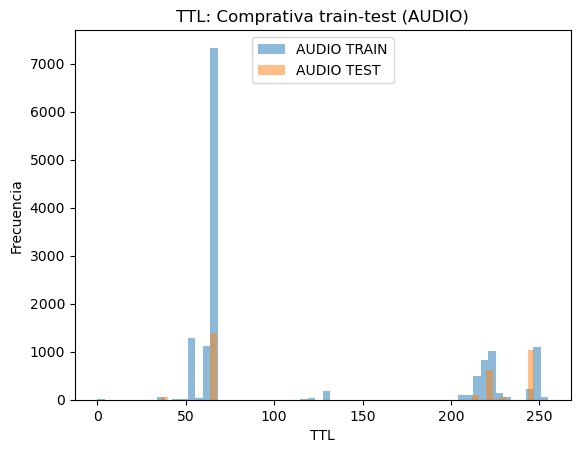

In [19]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(audio_train['ttl'], bins=60, alpha=0.5, label='AUDIO TRAIN')
plt.hist(audio_test['ttl'], bins=65, alpha=0.5, label='AUDIO TEST')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('TTL')
plt.ylabel('Frecuencia')
plt.title('TTL: Comprativa train-test (AUDIO)')
plt.legend(loc='upper center')

# Paso 6: Mostrar gráfico
plt.show()

## CAMERA:

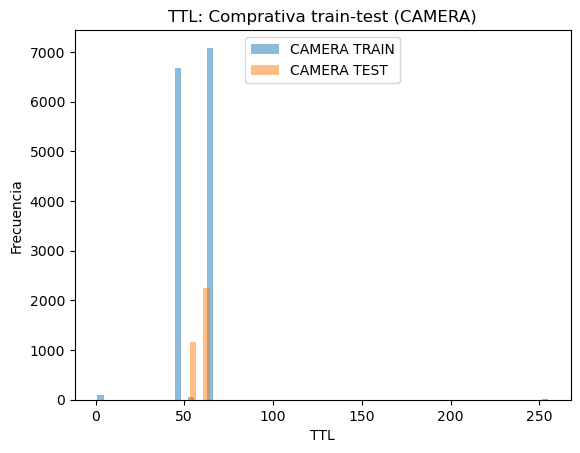

In [22]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(camera_train['ttl'], bins=70, alpha=0.5, label='CAMERA TRAIN')
plt.hist(camera_test['ttl'], bins=65, alpha=0.5, label='CAMERA TEST')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('TTL')
plt.ylabel('Frecuencia')
plt.title('TTL: Comprativa train-test (CAMERA)')
plt.legend(loc='upper center')

# Paso 6: Mostrar gráfico
plt.show()

## HA:

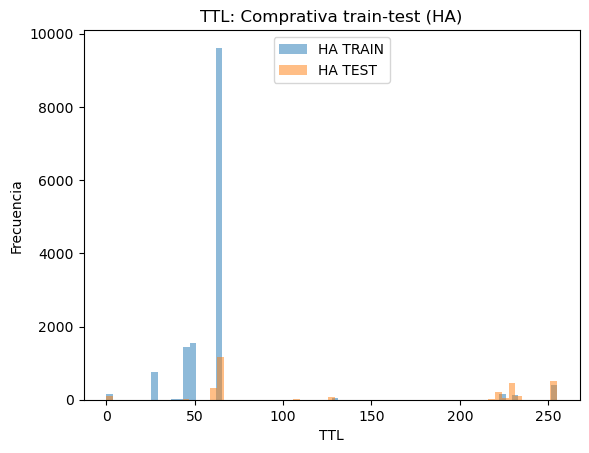

In [23]:
# Paso 4: Hacer histogramas para cada subconjunto
plt.hist(HA_train['ttl'], bins=70, alpha=0.5, label='HA TRAIN')
plt.hist(HA_test['ttl'], bins=65, alpha=0.5, label='HA TEST')

# Paso 5: Agregar etiquetas para los ejes y títulos del gráfico
plt.xlabel('TTL')
plt.ylabel('Frecuencia')
plt.title('TTL: Comprativa train-test (HA)')
plt.legend(loc='upper center')

# Paso 6: Mostrar gráfico
plt.show()